# In Class Lab 11 Template
# Cosmological Tools

In this lab we will build on the Class called `CosmologicalTools` that we developed as part of Lab 10. 

For Lab 11, we will create functions that compute: Look Back Time, Comoving Distance, Luminosity Distance and Angular Diameter Distance. 


In [39]:
# import modules
import numpy as np
import astropy.units as u

# For Lab 12: Import the constant for the speed of light
from astropy.constants import c

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


#################
# Lab 11 : 
# tool for numerical integration from SciPy  
from scipy.integrate import simps



# Part 1 :  Look Back Time

A) 

Complete the function ``LookBackTime`` that takes as inputs the desired redshift and returns the corresponding time (Gyr ago). To do this, we need to Numerically integrate :


$ t_L = \int_0^z \frac{dz'}{(1+z') H(z')}$


The scipy function ``simps`` is really useful for numerical integration. At the start of the program I have 
imported this module:  ``from scipy.integrate import simps`` 


To use it, I have already defined an array with redshifts, spaced in intervals of 0.001
    
``zrange = np.arange(zo, ze, 1e-3)``

Where zo is the redshift of the observer (it's us, so zo= 0).  And ze is the redshift of the emitter. 

Next define the integrand and utilize simps to integrate:

``simps(y(x), x)``


B) 

- How many Gyr ago was z = 1 in the benchmark cosmology? 
- What is the age of the universe in the benchmark cosmology?  Use a large z value to estimate this. 
- What is the age in the Einstein De Sitter cosmology (where $\Omega_m=1$ and all other density parameters are 0) ? 
- Which cosmology results in the youngest age for the universe? 


C) 

Complete the plot template for Look Back Time as a function of 1+ z for both the benchmark and Einstein De Sitter cosmologies. You will need loop over the ``LookBackTime`` function  from z = (0, 50) using a list comprehension. Follow the instructions in the template. 


# Part 2:  Comoving and Proper Distance


A)

Complete the Method  ``ComovingDistance`` that takes as input: the redshift when the photon was observed and the redshift when the photon was emitted.  The function returns the Comoving Radial Distance from an observer at z=z_o, $D_C(z)$, by numerically integrating the following: 

$D_C(z) = c \int_{z_0}^{z_e} \frac{dz'}{H(z)}$

Where $c$ is the speed of light.  If $z_0$=0, $D_C(0)$ is equivalent to the proper distance to that object today (line of sight distance).
 
 D) 

Complete the Method ``ProperDistance`` that takes as input the the redshift when the photon was observed and emitted and returns the Proper Distance at that observed redshift.  I.e. it computes:

$\frac{D_C(z)}{(1+z_0)}$  

If $z_0$=0 this function returns the same value as the `ComovingDistance` function.

 
 
C)
- What is the size of the observable universe in the Benchmark cosmology today?  (use a large redshift) 
- What is the size in the Einstein De Sitter cosmology?  Which is smaller? 


D)

What is the radial distance between two galaxies that are closely located on the sky, where one is at z=0.01 and the second galaxy is at z =0.05 ?  Compute this for today and also for an observer at z=0.01


E) 

What is the size of the observable universe at z=2 ? 

F) 

Plot the Horizon Distance as a Function of Redshift out to z=10 for the BenchMark and Einstein DeSitter Cosmology




# Part 3:  Luminosity Distance

Determining distances to standard candles


A)

Complete the function ``LuminosityDistance`` that takes as input the emitted redshift and returns

$D_L = D_C(1+z)$

B)

Consider a Type 1A  Supernova (absolute magnitude M = -19.3 $\pm$ 0.3) that goes off at an unknown redshift.  We measure an apparent magnitude m = 25.1. 

- What is the inferred Luminosity Distance ($D_{LSne}$) ? 


$m-M = 5 Log(D_{LSne}/{\rm Mpc})  + 25  \qquad  D_{LSne} =  10^{(m - M - 25)/5}$


-  Using the function ``LuminosityDistance``, what redshift most closely returns the inferred $D_{LSne}$?

-  Using the function ``ProperDistance``, what is the proper distance from an observer on earth to the supernova? 
(note you could equivalently use the function ``ComovingDistance``)


# Part 4 : Angular Diameter Distance


Translating angular separations into projected distances. 

A)

Complete the function ``AngularDiameterDistance``, which takes as input the desired redshift and returns

$D_A = D_C/(1+z)$. 

B)

Complete the function ``Size``, which takes as input the desired redshift and angle (assumed to be in arcsec) that is the size of an object, or size of the angle between two galaxies, and returns the true projected separation. 


$\theta = \frac{D_{\rm sep}}{D_A}$


C) 

Consider two galaxies that are located at an average redshift of 1.0 and separated by an angle of 1''.  What is their physical separation in kpc ?

In [77]:
class CosmologicalTools:
    # Define a class that provides functions to compute various cosmological quantities
    # for a given cosmology  
        
    def __init__(self, OmegaM0, OmegaR0, OmegaL0, h):
        """ initialize the instance of the class - for any given Cosmology
        
        PARAMETERS
        ----------
        OmegaM0: `float`
            the Matter density parameter at z=0
        
        OmegaR0: `float` 
            the radiation density parameter at z=0
        
        OmegaL0: `float`
            The dark energy density parameter at z=0
            
        h: `float` 
            the Normalization for the hubble parameter at z=0
        """
        
        # initialize the cosmology at z=0
        self.OmegaM0 = OmegaM0    ### Matter Density Parameter
        self.OmegaR0 = OmegaR0    ### Radiation Density Parameter
        self.OmegaL0 = OmegaL0    ### Dark Energy Density Parameter
        self.OmegaK0 = 1 - (OmegaM0 + OmegaR0 + OmegaL0)    #### Curvature Density Parameter
    
        self.h = h   # Normalization of Hubble Parameter   
        self.Ho = self.h*100*u.km/u.s/u.Mpc #  Hubble Constant at z=0  100 h km/s/Mpc
    
    
    # Question 1 A)
    def HubbleParameter(self, z):
        """  Method that defines the Hubble Parameter as a function of redshift
            H(z)^2 = H_o^2 [ OmegaM0(1+z)^3 + OmegaR0(1+z)^4 + OmegaLambda0 + OmegaK0(1+z)^2] 
        
        PARAMETERS
        ----------
            z: `float`
                redshift 
            
        RETURNS
        -------
            Hz: `float`
                Hubble Parameter as a function of z, in units of km/s/Mpc
        """
        
        # FILL THIS IN 
        OmegaM = self.OmegaM0*(1+z)**3 # OmegaM 
        OmegaR = self.OmegaR0*(1+z)**4
        OmegaL = self.OmegaL0
        OmegaK = self.OmegaK0*(1+z)**2
        
        Hz = self.Ho*np.sqrt(OmegaM+OmegaR+OmegaL+OmegaK)
        
        return  Hz
    
    
    
    # Question 2 A)
    def OmegaM_Z(self,z):
        """ Method that defines the matter density parameter as a function of redshift
        OmegaM0*(1+z)**3*(Ho/Hz)^2
        
        PARAMETERS
        ----------
        z  `float or np.ndarray`
            Redshift
        
        RETURNS
        -------
        OmegaM: `float or np.ndarray`
            Matter Density Parameter at the given redshift.
        """
        
        OmegaM = self.OmegaM0*(1+z)**3*self.Ho**2/self.HubbleParameter(z)**2
        
        return OmegaM
    
    def OmegaR_Z(self,z):
        """ Method that defines the radiation density parameter as a function of redshift
         OmegaR0*(1+z)**4*(Ho/Hz)^2
         
        PARAMETERS
        ----------
        z  `float or np.ndarray`
            Redshift
        
        RETURNS
        -------
        OmegaR: `float or np.ndarray`
            Radiation Density Parameter at the given redshift.
        """
        
        OmegaR =   self.OmegaR0*(1+z)**4*self.Ho**2/self.HubbleParameter(z)**2
        
        return OmegaR
    
    
    def OmegaL_Z(self,z):
        """ Method that defines the dark energy density parameter as a function of redshift
        OmegaL0*(Ho/Hz)^2
        
        PARAMETERS
        ----------
        z  `float or np.ndarray`
            Redshift
        
        RETURNS
        -------
        OmegaL: `float or np.ndarray`
            Dark Energy Density Parameter at the given redshift.
        """
            
        OmegaL = self.OmegaL0*self.Ho**2/self.HubbleParameter(z)**2
        
        return OmegaL
    
    
    
    ###########################
    # Lab 11 Starts Here
    ###########################
    
    
    # Question 1 A) 
    
    def LookBackTime(self, ze):
        """ Method that computes the Look Back Time at a given redshift
         i.e. the difference in time from when a photon was emitted to when it is observed at present day.
         
         Integrand: 1/H(z)/(1+z)
         
        PARAMETERS
        ----------
        ze : `float`
            Redshift emitted (ze). This cannot be an array
            
        RETURNS
        -------
        time: `float`
            Time in units of Gyr ago (relative to present day)
        """

        
        # Observed redshift - today
        zo = 0
    
        # define an array with redshifts, spaced in intervals of 0.001 from zo to ze
        zrange = np.arange(zo, ze, 1e-3)
        
        
        # Integrand
        # y = (1/H(zrange)).to(GYR)  /  (1+zrange)
        # But need to correct units of 1/H to be Gyr rather than seconds  
        # use the astropy.units functionality .to(units)
        # FILL THIS IN 
        y = (1/self.HubbleParameter(zrange)).to(u.Gyr)*(1/(1+zrange))
        
        # Integrate y numerically over zrange and return in units of Gyr
        # FILL THIS IN 
        time = simps(y,zrange)*u.Gyr
        return time
    
    
    # Question 2 A) 
    
    def ComovingDistance(self, zo, ze):
        """ Method that computes the Comoving Radial Distance to an object at a given redshift.
        i.e, Distance to a galaxy that is moving with the Hubble Flow (expanding universe) at a given redshift
            Dc = c*Int_z0^ze 1/H(z)

        PARAMETERS
        ----------
        zo: `float`
            Redshift of the observer
            
        ze: `float`
            Redshift of the object emitting the photon
            
        RETURNS
        -------
        DC: `float`
            Comoving Radial Distance (Mpc)
        """

        # define an array with redshifts, spaced  in intervals of 0.001
        # Note that if you want redshifts smaller than 0.001 you'll need to refine this
        zrange = np.arange(zo, ze, 1e-3)
    
        
        # Integrand
        # 1/H(zrange)*speed of light
        # Speed of light is loaded in modules from astropy, but in units of m/s --> need in km/s
        # FILL THIS IN
        c_new = c.to(u.km/u.s)
        y=c.to(u.km/u.s)*(1/self.HubbleParameter(zrange))
    
        # Integrate y numerically over zrange and return in units of Mpc
        # FILL THIS IN 
        DC = simps(y,zrange)*u.Mpc
        
        return DC
    
    
    # Question 2 D) 
    
    def ProperDistance(self, zo, ze):
        """ Method that returns the Proper Distance to an object at some redshift (ze)
            to an observer a given redshift (the distance measured by a ruler). 
            This is the Horizon Distance.
             R(tobs)*DC = DC/(1+zobs)
            
        PARAMETERS
        ---------
             
        zo: `float`
            Redshift of the observer
            
        ze: `float`
            Redshift of the object emitting the photon
            
        RETURNS
        -------
        DH: `float`
            Proper Distance (Mpc)
        """
    
        # Comoving Distance[ independent of time] x the scale factor at the time of observation.
        # FILL THIS IN 
        DH = self.ComovingDistance(zo,ze)/(1+zo)
        return DH

 
    # Question 3 A)
    
    def LuminosityDistance(self, ze): 
    # Function that computes DL, the luminosity distance of a galaxy at a given redshift
    # Input:    Redshift emitted (ze) 
    # Output:   DL  in Mpc
        """ Method that computes the Luminosity Distance to an object at some redshift (ze)
               DL = DC*(1+zobs)
            
        PARAMETERS
        --------- 
        ze: `float`
            Redshift of the object emitting the photons
            
        RETURNS
        -------
        DL: `float`
            Luminosity Distance (Mpc)
        """

        # FILL THIS IN
        
        
        return 
    

    # Question 4 A)
    
    def AngularDiameterDistance(self, ze): 
        """ Method that computes the Angular Diameter Distance to an object at some redshift (ze)
               DA = DC/(1+z_emitted)
            DA is the distance to the source,  such that it subtends the same angle 
            it would have in Euclidean Space

            
        PARAMETERS
        --------- 
        ze: `float`
            Redshift of the object emitting the photons
            
        RETURNS
        -------
        DA: `float`
            Angular Diameter Distance (Mpc)
        """
    
        #  FILL THIS IN
        
        return      
    
    
    # Question 4 B) 
    
    def Size(self, ze, angle):
        """ Method to compute the physical distance corresponding to a given 
            angular separation at a given redshift
            S = DA*angle
        
        PARAMETERS
        --------- 
        ze: `float`
            Redshift of the object emitting the photons
            
        angle: `float`
            Angular separation or size (arcsec)
            
        RETURNS
        -------
        size: `float`
            Physical Size of the Object or the Separation between objects (kpc)
        """
        
        # convert angle from arcsec to radians
        angleRad = (angle*u.arcsec).to(u.rad)
    
        # FILL THIS IN
     
        return 
    
    

    
    

In [78]:
# Define the benchmark cosmology at z =0
# Planck 2016 results. XIII. Cosmological parameters   
# Planck Collaboration+2016 A&A 594 13  Table 4, column 2 

OmegaM0_planck = 0.308   # Matter Density Parameter
OmegaR0_planck = 8.24e-5  # Radiation Density Parameter
OmegaL0_planck = 0.692  # Dark Energy Density Parameter
h_planck = 0.6781   # Hubble Constant  100 h km/s/Mpc
   

In [79]:
# Define the Einstein-DeSitter cosmology (Matter Dominated)
OmegaMD = 1
OmegaRD = 0
OmegaLD = 0
# h is the same = h_planck


In [80]:
# Define here an instance of the Class Cosmological Tools that follows the Benchmark Cosmology
BenchMark = CosmologicalTools(OmegaM0_planck,OmegaR0_planck,OmegaL0_planck,h_planck)


In [81]:
# Define a New Instance of the Class with Einstein De Sitter Cosmology 
DeSitter = CosmologicalTools(OmegaMD,OmegaRD,OmegaLD,h_planck)


##  Question 1 B) 

In [67]:
# Question 1 B) 

# How many Gyr ago was z=1 in the Benchmark cosmology?
z_1 = BenchMark.LookBackTime(1)
print(z_1)

7.926721013648649 Gyr


In [68]:
# Question 1 B) 

# What is the Age of the Universe in the Benchmark Cosmology  (put in a large z)
age = BenchMark.LookBackTime(1000)
print(age)

13.794599325497552 Gyr


In [69]:
# What is the Age of the Universe in the Einstein De Sitter Cosmology
age_de = DeSitter.LookBackTime(1000)
print(age_de)

9.612754736137568 Gyr


In [70]:
# Inverse of the Hubble Parameter today is roughly the age of the universe. but not exactly.


####  Which cosmology results in a younger universe?


## Question 1 C) 


Complete the plot template for Look Back Time as a function of 1+ z for both the benchmark and Einstein De Sitter cosmologies. You will need loop over the ``LookBackTime`` function  from z = (0, 50) using a list comprehension. Follow the instructions in the template. 

List Comprehension Syntax: ``[ expression for item in list if conditional ]``
This is equivalent to:

``for item in list:``

$\indent$``     if conditional:``
    
$\indent$$\indent$``        expression``

In [71]:
# Question 1 C)   Plotting Look Back Time

# First define an array of redshift for the X axis
# Define an array of redshift to some max redshift
zmax = 50
zmin = 0.001
zrange = np.arange(zmin, zmax, 0.01)

In [72]:
# Create a list comprehension to compute an array of Look Back Time for each element in zrange
# NOTE THIS GENERATES A LIST NOT AN ARRAY
TimeBenchMark = [BenchMark.LookBackTime(i).value for i in zrange]


In [73]:
TimeDeSitter = [DeSitter.LookBackTime(i).value for i in zrange]

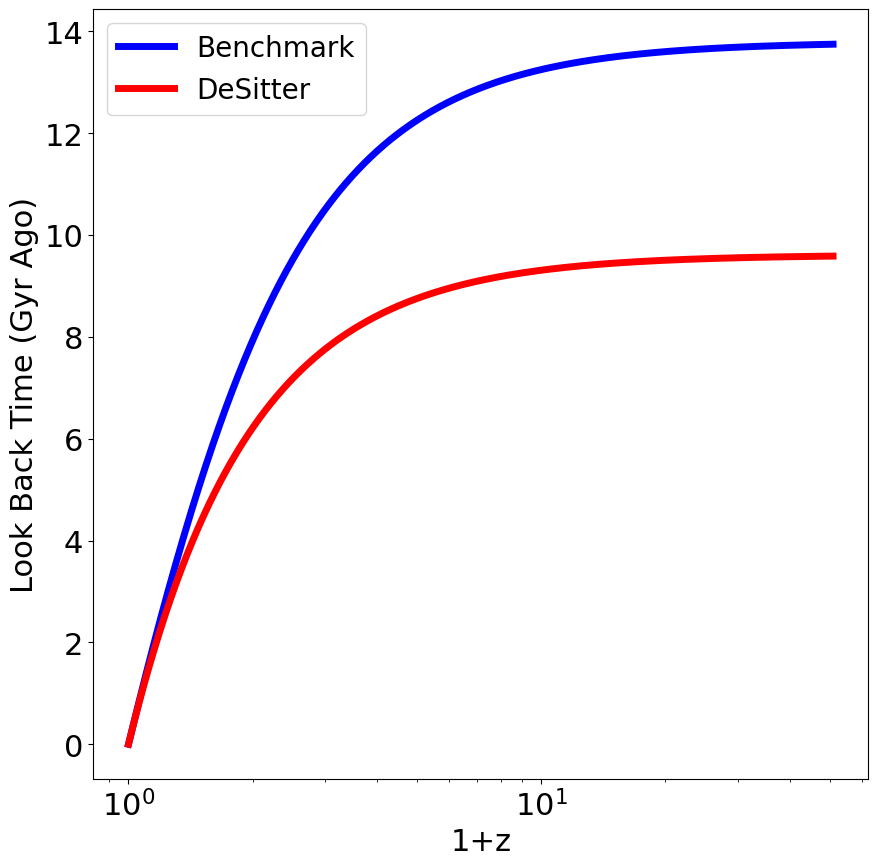

In [74]:
# Plot the Look Back Time as a Function of Redshift out to z=10
################################################################

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)


# Look Back Time Benchmark
# FILL THIS IN
plt.semilogx(zrange+1 , TimeBenchMark,  color='blue', linewidth=5, label='Benchmark')


# Look Back Time Einstein De Sitter
# FILL THIS IN
plt.semilogx(zrange+1 ,  TimeDeSitter, color='red', linewidth=5, label='DeSitter')


# Add axis labels
plt.xlabel('1+z', fontsize=22)
plt.ylabel('Look Back Time (Gyr Ago)', fontsize=22)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

legend = ax.legend(loc='upper left',fontsize=20)

# Save to a file
plt.savefig('Lab11_LookBackTime.png')

## Question 2 C)

In [82]:
# Question 2 B

# What is the size of the presently observable universe in the Benchmark cosmology ? (pick a large z)
print(BenchMark.ComovingDistance(0,1000))

13892.809961829418 Mpc


In [83]:
# Double Check that the size of the Comoving Distance and Proper Distance are the same
# since the observer is at z=0 
print(BenchMark.ProperDistance(0,1000))

13892.809961829418 Mpc


In [84]:
# What is the size of the presently observable universe in the Einstein De Sitter cosmology? (pick a large z)
print(DeSitter.ProperDistance(0,1000))

8562.658013478022 Mpc


In [85]:
# Which Universe is larger? 
print("The Bench Mark universe is larger")

The Bench Mark universe is larger


## Question 2 D)

In [86]:
# Consider two closely located 
# galaxies on the sky, where one galaxy
# is  at z=0.01 and the second galaxy is at z =0.05 
z1 = 0.01
z2 = 0.05
Dist_z1 = BenchMark.ComovingDistance(0,z1)
Dist_z2 = BenchMark.ComovingDistance(0,z2)

In [90]:
# What is Line of Sight Distance between these galaxies today (z=0)? 
# This is equivalent to the Comoving Distance or Proper Distance between the galaxies
diff = -(Dist_z1-Dist_z2)
print("The distance between the two galaxies is : ", diff)

The distance between the two galaxies is :  174.44993322863948 Mpc


In [91]:
# What is the Proper Distance between these two galaxies as measured by galaxy 1 (at z=0.01)?
print(BenchMark.ProperDistance(z1,z2))


168.3646839811862 Mpc


## Question 2 E)

In [95]:
# What is the size of the observable universe at z=2? 
z_2_size=BenchMark.ProperDistance(2,10000)
print(BenchMark.ProperDistance(2,10000))

2948.045054341626 Mpc


In [96]:
# how much larger was the universe then vs now?
z_now_size = BenchMark.ProperDistance(0,10000)
diff = z_now_size-z_2_size
print(diff)

11206.335775791238 Mpc


##  Question 2 F)
Plot the Horizon Distance as a Function of Redshift out to z=10 for the BenchMark and Einstein DeSitter Cosmology


In [97]:
zmax = 10
zmin = 0.001
zrange2 = np.arange(zmin, zmax, 0.5)

In [98]:
# What is the size of the universe at each redshit in each cosmology
# We need to again use a list comprehension 
Universe_BenchMark = [BenchMark.ProperDistance(i,2000).value for i in zrange2]
Universe_DeSitter = [DeSitter.ProperDistance(i,2000).value for i in zrange2]

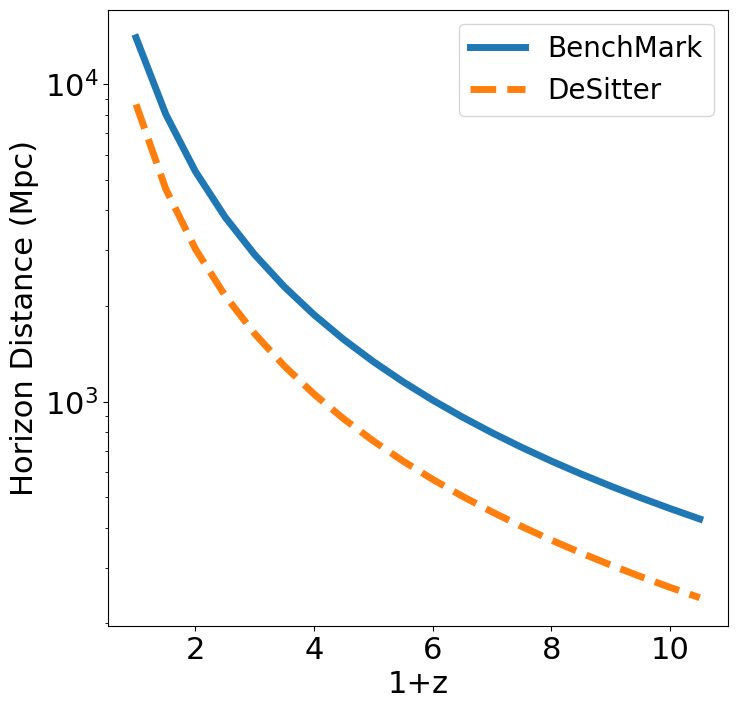

In [99]:
# Plot the Horizon Distance as a Function of Redshift out to z=10
###############################################################################

fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)


# Comoving Distance
# FILL THIS IN
plt.semilogy(zrange2+1, Universe_BenchMark , linewidth=5, label='BenchMark')

plt.semilogy(zrange2+1 , Universe_DeSitter  , linewidth=5, linestyle='--', label='DeSitter')


# Add axis labels
plt.xlabel('1+z', fontsize=22)
plt.ylabel('Horizon Distance (Mpc)', fontsize=22)


#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

legend = ax.legend(loc='upper right',fontsize=20)

# Save to a file
plt.savefig('Lab11_HorizonDistance.png')

## Question 3 B)

 Luminosity distances are used to measure distances and infer redshifts for standard candles. 

 Consider that you observe a Type Ia Supernova with an apparent magnitude, m = 25.1
 Absolute magnitude of a Type Ia Supernova is -19.3±0.03 

 Using the Benchmark cosmology, determine this Supernova's redshift and its Proper Distance from us.


In [ ]:
# Question 3 B) 


In [ ]:
# What is the Luminosity Distance? 
# m-M = 5*log(DL/Mpc) + 25



In [ ]:
# Now reverse engineer the problem. What redshift gives you the computed Luminosity Distance? 
# in reality the redshift is determined by identifying the redshift of the host.  


In [ ]:
# What is the proper distance to this supernova given our current rate of expansion? 


## Question 4 C) 

In [ ]:
# Question 4 C)  

# Angle = Size/DA
# What is the separation between two galaxies separated by 1 arcsec at z=1 in the Benchmark Cosmology

